In [184]:
import numpy as np
import pandas as pd

In [185]:
df = pd.read_csv("/content/sample_data/spam.csv",encoding='latin-1')

In [186]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
942,spam,How about getting in touch with folks waiting ...,NaN,NaN,NaN
1444,ham,Those ducking chinchillas,NaN,NaN,NaN
1964,ham,Honeybee Said: *I'm d Sweetest in d World* God...,NaN,NaN,NaN
1406,spam,"URGENT, IMPORTANT INFORMATION FOR O2 USER. TOD...",NaN,NaN,NaN
1417,ham,No wonder... Cos i dun rem seeing a silver car...,NaN,NaN,NaN


In [187]:
#1.Data Cleaning
#2.EDA
#3.Text Preprocessing
#4.Model building
#5.Evaluation
#6.Imporvement



**Data Cleaning**

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [189]:
#drop last  3 column as they don't have any value. They just contain null value
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)

In [190]:
df.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [191]:
#renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [192]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [193]:
df['target'] = encoder.fit_transform(df['target'])

In [194]:
df.sample(5)

,target,text
2349,0,Yar else i'll thk of all sorts of funny things.
257,0,Where are you lover ? I need you ...
5000,0,"Nope. Since ayo travelled, he has forgotten hi..."
639,0,I had askd u a question some hours before. Its...
4403,0,"Sorry, I'll call later &lt;#&gt; mins"


In [195]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [196]:
#check whether the missing value is availabe or not
df.isnull().sum()

target    0
text      0
dtype: int64

In [197]:
#check whether the duplicate value available in the data sets
df.duplicated().sum()

403

In [198]:
#remove the duplicated value from the datasets
df = df.drop_duplicates(keep='first')

In [199]:
df.duplicated().sum()

0

In [200]:
df.shape

(5169, 2)

**EDA(Exploratory Data Analysis)**

In [201]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [202]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

([<matplotlib.patches.Wedge at 0x7f4961be80a0>,
 [Text(-1.0144997251399075, 0.42519443516002464, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001339, '87.367'),
  Text(0.5533635081542612, -0.23192418555038377, '12.633')])

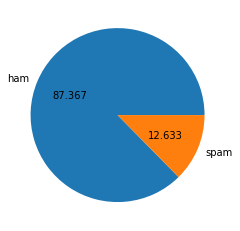

In [203]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.3f")

In [204]:
#data is imbalance

In [205]:
import nltk

In [206]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [207]:
df['num_characters'] = df['text'].apply(len)

In [208]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [209]:
#fetching the number of words in the text
df['num_of_word'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [210]:
df.head()

,target,text,num_characters,num_of_word
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [211]:
df['num_sentence'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [212]:
df.head()

,target,text,num_characters,num_of_word,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [213]:
df[['num_characters','num_of_word','num_sentence']].describe()

,num_characters,num_of_word,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [214]:
df[df['target']==0][['num_characters','num_of_word','num_sentence']].describe()

,num_characters,num_of_word,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [215]:
df[df['target']!=0][['num_characters','num_of_word','num_sentence']].describe()

,num_characters,num_of_word,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


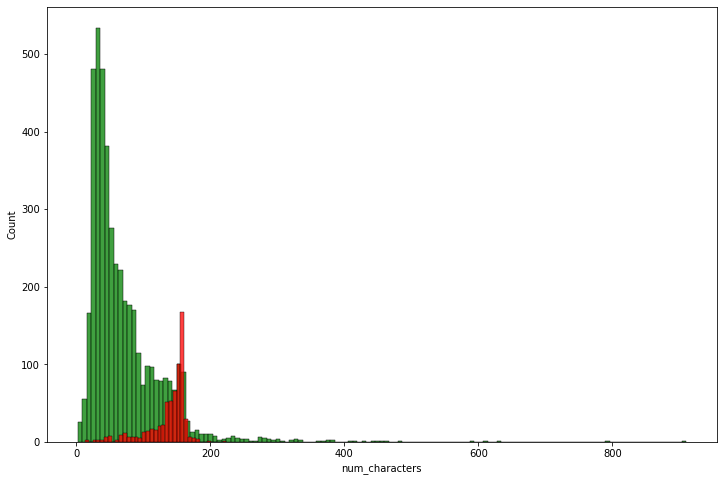

In [216]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_characters'],color='green')
sns.histplot(df[df['target']!=0]['num_characters'],color='red')

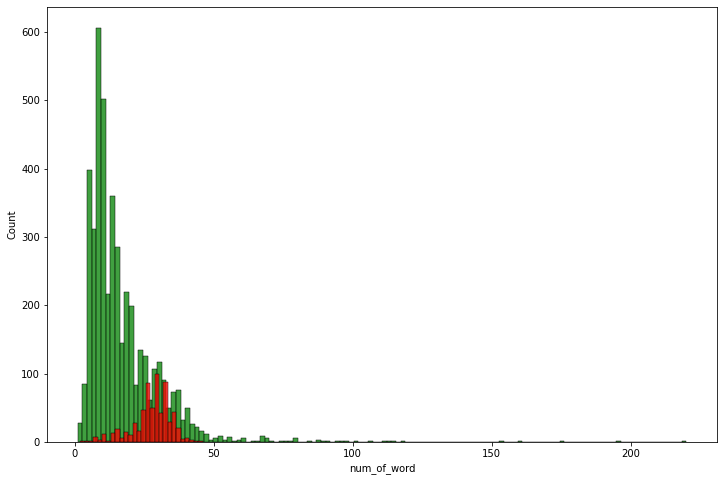

In [217]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_of_word'],color='green')
sns.histplot(df[df['target']!=0]['num_of_word'],color='red')

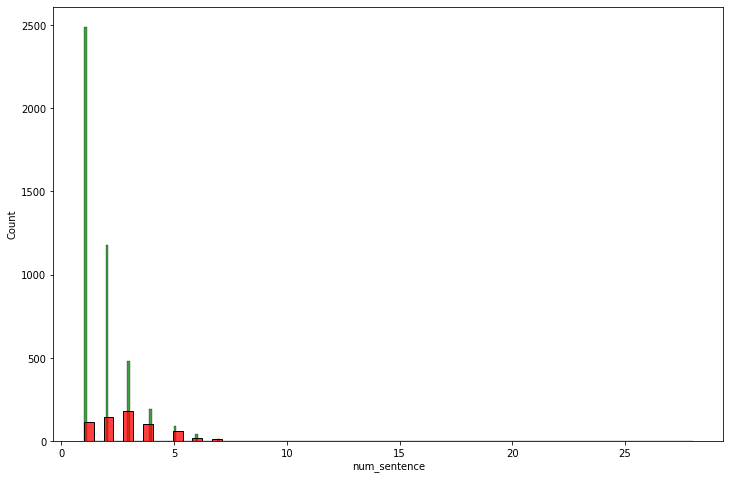

In [218]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_sentence'],color='green')
sns.histplot(df[df['target']!=0]['num_sentence'],color='red')

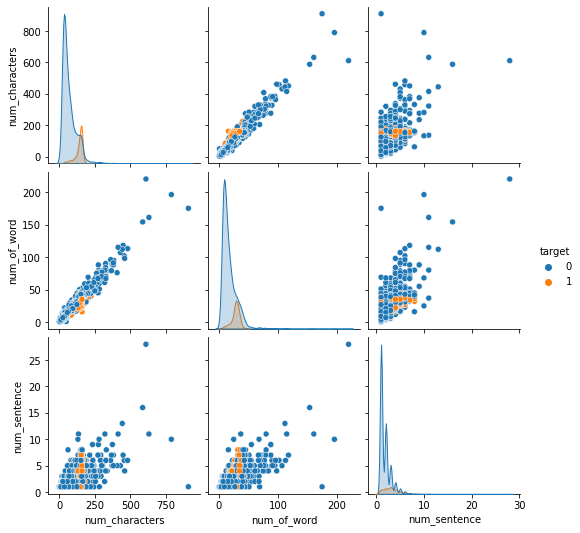

In [219]:
sns.pairplot(df,hue='target')

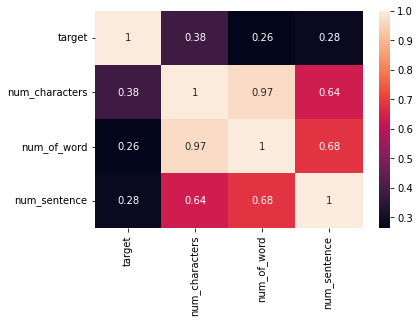

In [220]:
sns.heatmap(df.corr(),annot=True)

**Data Preprocessing**


1.   Lower case
2.   Tokenization
3.   Removing special characters
4.   Removing Stop words
2.   Stemming








In [221]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [222]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
#removing the special characters
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)
#removing the stop words
  text = y[:]
  y.clear()
  for i in text:
    if i not in stopwords.words('english')and i not in string.punctuation:
      y.append(i)
#performing the stemming
  text = y[:]
  y.clear()
  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

  return y
  

In [223]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [224]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [225]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [226]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [227]:
transform_text('I loved the umesh lecture on machine learning. How about you?')

'love umesh lectur machin learn'

In [228]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [229]:
df['transformed_text']=df['text'].apply(transform_text)

In [230]:
df.head()

,target,text,num_characters,num_of_word,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [231]:
from wordcloud import WordCloud
wc = WordCloud(width=700,height=800,min_font_size=10,background_color = 'white')

In [232]:
spam_wc = wc.generate(df[df['target']== 1]['transformed_text'].str.cat(sep = " "))

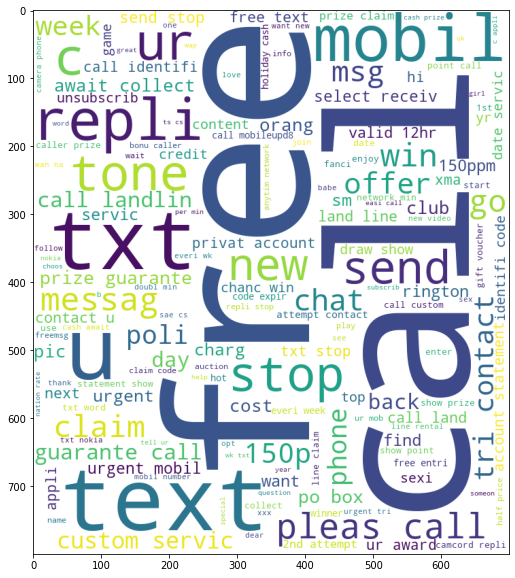

In [233]:
plt.figure(figsize=(20,10))
plt.imshow(spam_wc)

In [234]:
ham_wc = wc.generate(df[df['target']!= 1]['transformed_text'].str.cat(sep = " "))

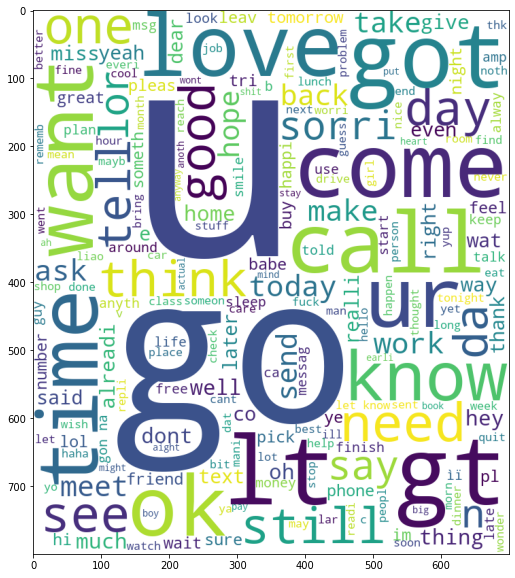

In [235]:
plt.figure(figsize=(20,10))
plt.imshow(ham_wc)

In [236]:
df.head()

,target,text,num_characters,num_of_word,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [237]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [238]:
len(spam_corpus)

9939

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


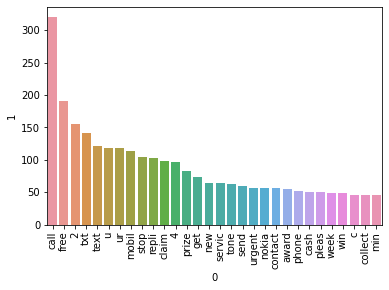

In [239]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [240]:
ham_corpus = []
for msg in df[df['target']!=1]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [241]:
len(ham_corpus)

35394

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


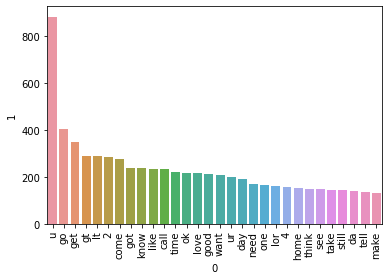

In [242]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

**Model Building**

In [243]:
#Text Vectorization
#using Bag of Words
df.head()

,target,text,num_characters,num_of_word,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [244]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [245]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [246]:
X.shape

(5169, 6708)

In [247]:
y = df['target'].values

In [248]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [249]:
from sklearn.model_selection import train_test_split

In [250]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [251]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [252]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [253]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [254]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [255]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [256]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [257]:
svc = SVC(kernel ='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [258]:
clfs = {
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'Dt':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'ETC':etc,
    'GBDT':gbc,
    'Xgb':xgb
}

In [259]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)

  return accuracy,precision

In [260]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9284332688588007, 0.7580645161290323)

In [261]:

accuracy_scores = []
precision_scores = []
for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)

    print("For",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    

For SVC
Accuracy -  0.9284332688588007
Precision -  0.7580645161290323
For KN
Accuracy -  0.90715667311412
Precision -  1.0
For NB
Accuracy -  0.9642166344294004
Precision -  0.8344370860927153
For Dt
Accuracy -  0.9235976789168279
Precision -  0.9154929577464789
For LR
Accuracy -  0.9709864603481625
Precision -  0.9736842105263158
For RF
Accuracy -  0.971953578336557
Precision -  1.0
For AdaBoost
Accuracy -  0.9632495164410058
Precision -  0.9464285714285714
For BgC
Accuracy -  0.9622823984526112
Precision -  0.9159663865546218
For ETC
Accuracy -  0.9777562862669246
Precision -  0.9914529914529915
For GBDT
Accuracy -  0.9439071566731141
Precision -  0.9444444444444444
For Xgb
Accuracy -  0.941972920696325
Precision -  0.9431818181818182


In [262]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [263]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.907157,1.000000
5,RF,0.971954,1.000000
8,ETC,0.977756,0.991453
4,LR,0.970986,0.973684
6,AdaBoost,0.963250,0.946429
9,GBDT,0.943907,0.944444
10,Xgb,0.941973,0.943182
7,BgC,0.962282,0.915966
3,Dt,0.923598,0.915493
2,NB,0.964217,0.834437


In [264]:
perfomance_df1 = pd.melt(performance_df,id_vars="Algorithm")

In [265]:
perfomance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.907157
1,RF,Accuracy,0.971954
2,ETC,Accuracy,0.977756
3,LR,Accuracy,0.970986
4,AdaBoost,Accuracy,0.963250
5,GBDT,Accuracy,0.943907
6,Xgb,Accuracy,0.941973
7,BgC,Accuracy,0.962282
8,Dt,Accuracy,0.923598
9,NB,Accuracy,0.964217


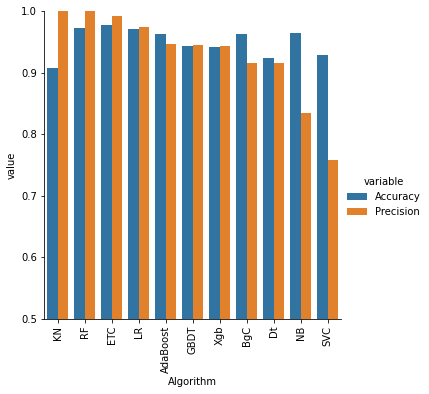

In [266]:
sns.catplot(x='Algorithm',y='value',hue='variable',data=perfomance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [268]:
#model imporves
#1. change the max_features [ara,eter pf TfIdf]
#temp_df = pd.DataFrame({'Algorithm':clfs.Keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision',ascending=False)

In [269]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [270]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [272]:
performance_df.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling,Precision_scaling
0,KN,0.907157,1.000000,0.907157,1.000000
1,RF,0.971954,1.000000,0.971954,1.000000
2,ETC,0.977756,0.991453,0.977756,0.991453
3,LR,0.970986,0.973684,0.970986,0.973684
4,AdaBoost,0.963250,0.946429,0.963250,0.946429
5,GBDT,0.943907,0.944444,0.943907,0.944444
6,Xgb,0.941973,0.943182,0.941973,0.943182
7,BgC,0.962282,0.915966,0.962282,0.915966
8,Dt,0.923598,0.915493,0.923598,0.915493
9,NB,0.964217,0.834437,0.964217,0.834437
